<a href="https://colab.research.google.com/github/maddy-codes/Image-Segmenter/blob/main/gans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from keras import Sequential,layers,Model
import keras

In [7]:
df = pd.read_csv("E:\Jaz\segmentation dataset\df.csv")
df

,Unnamed: 0,images,masks,collages
0,0,images/ds10_pexels-photo-687782.png,masks/ds10_pexels-photo-687782.png,collage/ds10_pexels-photo-687782.jpg
1,1,images/ds10_pexels-photo-835971.png,masks/ds10_pexels-photo-835971.png,collage/ds10_pexels-photo-835971.jpg
2,2,images/ds10_pexels-photo-850708.png,masks/ds10_pexels-photo-850708.png,collage/ds10_pexels-photo-850708.jpg
3,3,images/ds10_pexels-photo-864937.png,masks/ds10_pexels-photo-864937.png,collage/ds10_pexels-photo-864937.jpg
4,4,images/ds10_pexels-photo-865908.png,masks/ds10_pexels-photo-865908.png,collage/ds10_pexels-photo-865908.jpg
...,...,...,...,...
2662,2662,images/ds9_pexels-photo-884417.png,masks/ds9_pexels-photo-884417.png,collage/ds9_pexels-photo-884417.jpg
2663,2663,images/ds9_pexels-photo-884418.png,masks/ds9_pexels-photo-884418.png,collage/ds9_pexels-photo-884418.jpg
2664,2664,images/ds9_pexels-photo-884419.png,masks/ds9_pexels-photo-884419.png,collage/ds9_pexels-photo-884419.jpg
2665,2665,images/ds9_pexels-photo-884421.png,masks/ds9_pexels-photo-884421.png,collage/ds9_pexels-photo-884421.jpg


In [8]:
df.columns

Index(['Unnamed: 0', 'images', 'masks', 'collages'], dtype='object')

In [9]:
df.drop([df.columns[0]],axis=1,inplace=True)
df.drop([1732,1774],axis=0,inplace=True)
df.index = list(range(df.shape[0]))

In [10]:
df

,images,masks,collages
0,images/ds10_pexels-photo-687782.png,masks/ds10_pexels-photo-687782.png,collage/ds10_pexels-photo-687782.jpg
1,images/ds10_pexels-photo-835971.png,masks/ds10_pexels-photo-835971.png,collage/ds10_pexels-photo-835971.jpg
2,images/ds10_pexels-photo-850708.png,masks/ds10_pexels-photo-850708.png,collage/ds10_pexels-photo-850708.jpg
3,images/ds10_pexels-photo-864937.png,masks/ds10_pexels-photo-864937.png,collage/ds10_pexels-photo-864937.jpg
4,images/ds10_pexels-photo-865908.png,masks/ds10_pexels-photo-865908.png,collage/ds10_pexels-photo-865908.jpg
...,...,...,...
2660,images/ds9_pexels-photo-884417.png,masks/ds9_pexels-photo-884417.png,collage/ds9_pexels-photo-884417.jpg
2661,images/ds9_pexels-photo-884418.png,masks/ds9_pexels-photo-884418.png,collage/ds9_pexels-photo-884418.jpg
2662,images/ds9_pexels-photo-884419.png,masks/ds9_pexels-photo-884419.png,collage/ds9_pexels-photo-884419.jpg
2663,images/ds9_pexels-photo-884421.png,masks/ds9_pexels-photo-884421.png,collage/ds9_pexels-photo-884421.jpg


In [11]:
BASE_DIR = "E:/Jaz/segmentation dataset/supervisely_person_clean_2667_img/supervisely_person_clean_2667_img/"
RESIZE_BASE_DIR_IMGS = "E:/Jaz/segmentation dataset/resize/"

In [12]:
from PIL import Image
import os

In [13]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [14]:
for i in df['images']:
  img = Image.open(BASE_DIR+i)
  print(i)
  img_res = img.resize((512,512))

  img_res.save(BASE_DIR+i)
  #print(img.size)
  #print(img_res.size)


images/ds10_pexels-photo-687782.png
images/ds10_pexels-photo-835971.png
images/ds10_pexels-photo-850708.png
images/ds10_pexels-photo-864937.png
images/ds10_pexels-photo-865908.png
images/ds10_pexels-photo-865909.png
images/ds10_pexels-photo-865926.png
images/ds10_pexels-photo-879585.png
images/ds10_pexels-photo-883090.png
images/ds10_thailand-costume-girl-woman-157857.png
images/ds11_adorable-baby-beautiful-boy-41000.png
images/ds11_autumn-fall-baby-boy-child-59865.png
images/ds11_baby-boy-child-christmas-41173.png
images/ds11_baby-boy-hat-covered-101537.png
images/ds11_baby-child-kid-girl-161593.png
images/ds11_baby-cute-moe-brilliant-159754.png
images/ds11_baby-cute-moe-brilliant-159767.png
images/ds11_baseball-player-running-sport-163209.png
images/ds11_baseball-player-running-sport-163239.png
images/ds11_bluebells-woods-english-spring-160972.png
images/ds11_brothers-boys-kids-baby-50601.png
images/ds11_car-toy-childhood-child-163768.png
images/ds11_child-girl-laugh-cheerful-160842.

In [15]:
for i in df['masks']:
  img = Image.open(BASE_DIR+i)
  img_res = img.resize((512,512))

  img_res.save(BASE_DIR+i)
  #print(img.size)
  #print(img_res.size)

In [16]:
X = []
y = []
for image,mask in zip(df['images'],df['masks']):
  img = Image.open(BASE_DIR+image)
  msk = Image.open(BASE_DIR+mask)

  img_arr = np.asarray(img)
  msk_arr = np.asarray(msk)

  X.append(img_arr)
  y.append(msk_arr)

  print(img_arr.shape)
  print(msk_arr.shape)

Streaming output truncated to the last 5000 lines.
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 

In [17]:
 for i in range(len(X)):
  if X[i].shape != (512,512,3):
    print(i)

In [18]:
X = np.stack(X)

In [19]:
y = np.stack(y)

In [20]:
X.shape

(2665, 512, 512, 3)

In [21]:
y.shape

(2665, 512, 512, 3)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,shuffle=True,random_state=7)

In [44]:
import tensorflow as tf

def dice_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return 1 - (numerator + 1) / (denominator + 1)

def dice_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    smooth = 1e-8
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

In [45]:
#Build the model
inputs = layers.Input((512, 512,3))
s = layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = layers.Dropout(0.1)(c1)
c1 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = layers.MaxPooling2D((2, 2))(c1)

c2 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = layers.Dropout(0.1)(c2)
c2 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = layers.MaxPooling2D((2, 2))(c2)

c3 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = layers.Dropout(0.2)(c3)
c3 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = layers.MaxPooling2D((2, 2))(c3)

c4 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = layers.Dropout(0.2)(c4)
c4 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = layers.Dropout(0.3)(c5)
c5 = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path
u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = layers.concatenate([u6, c4])
c6 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = layers.Dropout(0.2)(c6)
c6 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = layers.concatenate([u7, c3])
c7 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = layers.Dropout(0.2)(c7)
c7 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = layers.concatenate([u8, c2])
c8 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = layers.Dropout(0.1)(c8)
c8 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = layers.concatenate([u9, c1], axis=3)
c9 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = layers.Dropout(0.1)(c9)
c9 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = layers.Conv2D(3, (1, 1), activation='tanh')(c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coefficient])
model.summary()



#Modelcheckpoint
checkpointer = keras.callbacks.ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

callbacks = [
keras.callbacks.EarlyStopping(patience=2, monitor='loss'),
keras.callbacks.TensorBoard(log_dir='logs')]

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
lambda_8 (Lambda)               (None, 512, 512, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_150 (Conv2D)             (None, 512, 512, 16) 448         lambda_8[0][0]                   
__________________________________________________________________________________________________
dropout_72 (Dropout)            (None, 512, 512, 16) 0           conv2d_150[0][0]                 
____________________________________________________________________________________________

In [46]:
model.fit(X_train,y_train,batch_size=10,epochs=20,callbacks=callbacks,validation_data=(X_test,y_test))

Epoch 1/20
240/240 [==============================] - 21s 84ms/step - loss: -0.9431 - dice_coefficient: 1.9431 - val_loss: -0.9726 - val_dice_coefficient: 1.9727
Epoch 2/20
240/240 [==============================] - 19s 78ms/step - loss: -0.9747 - dice_coefficient: 1.9747 - val_loss: -0.9726 - val_dice_coefficient: 1.9727
Epoch 3/20
240/240 [==============================] - 18s 76ms/step - loss: -0.9748 - dice_coefficient: 1.9748 - val_loss: -0.9726 - val_dice_coefficient: 1.9727
Epoch 4/20
240/240 [==============================] - 18s 77ms/step - loss: -0.9746 - dice_coefficient: 1.9746 - val_loss: -0.9726 - val_dice_coefficient: 1.9726
Epoch 5/20
240/240 [==============================] - 19s 78ms/step - loss: -0.9749 - dice_coefficient: 1.9749 - val_loss: -0.9726 - val_dice_coefficient: 1.9727
Epoch 6/20
240/240 [==============================] - 19s 78ms/step - loss: -0.9748 - dice_coefficient: 1.9748 - val_loss: -0.9726 - val_dice_coefficient: 1.9727
Epoch 7/20
240/240 [========

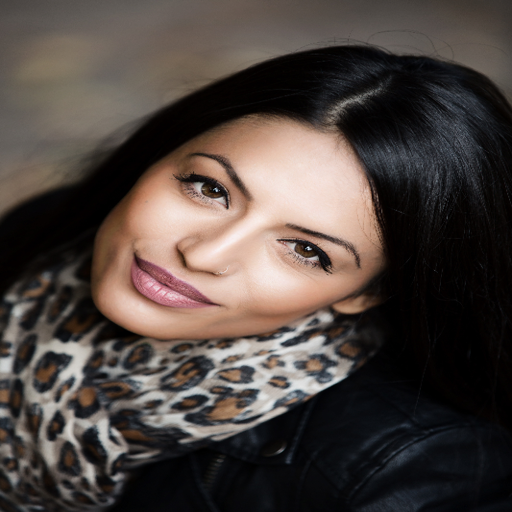

In [74]:
Image.fromarray(X_train[0])

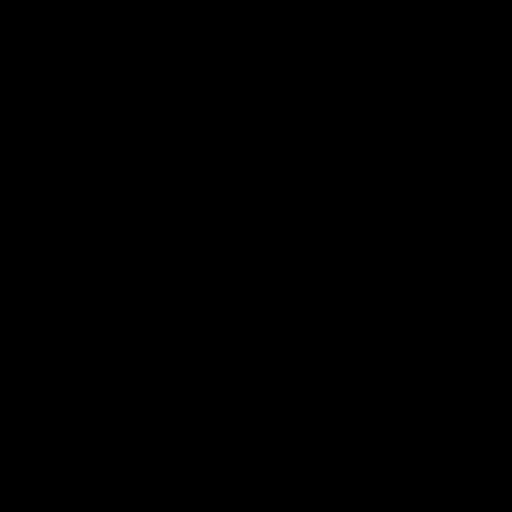

In [75]:
Image.fromarray(np.array(model.predict(np.expand_dims(X[0],axis=0))).reshape(512,512,3).astype(np.uint8))

In [26]:
l = pd.DataFrame({
    'haha' : [np.array([1,1,1]),[2,2,2]],
    'mama' : [[0,0,0],[1,1,1]]
})

In [27]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   haha    2 non-null      object
 1   mama    2 non-null      object
dtypes: object(2)
memory usage: 160.0+ bytes


In [28]:
l['haha'][0]

array([1, 1, 1])